In [1]:
import numpy as np
import scipy.linalg as linalg
from numpy import exp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
S0=40; K=40; r=0.1; T=1; sigma=0.3; Smax=100; M=100; N=400; CALLvsPUT='CALL'

In [3]:
dS=Smax/float(M)
dt=T/float(N)
i_values=np.arange(M)
j_values=np.arange(N)
grid=np.zeros(shape=(M+1,N+1))
boundary_conds=np.linspace(0,Smax,M+1)

In [4]:
if CALLvsPUT=='CALL':
    grid[:,-1]= np.maximum(boundary_conds-K,0)
    grid[-1,:-1]= Smax - K*exp(-r*dt*(N-j_values))  
if CALLvsPUT=='PUT':
    grid[:,-1]= np.maximum(K-boundary_conds,0)
    grid[0,:-1]=K*exp(-r*dt*(N-j_values))   

In [5]:
a= 0.5*dt*((r*i_values) - (sigma**2 * i_values**2))
b= 1 + dt*((sigma**2 * i_values**2) + r)
c= -0.5*dt*((r*i_values) + (sigma**2 * i_values**2))

coeffs= np.diag(a[2:M],-1) + np.diag(b[1:M]) + np.diag(c[1:M-1],1)

In [6]:
P, L, U = linalg.lu(coeffs)
aux = np.zeros(M-1)
for j in reversed(range(N)):
    aux[0] = np.dot(-a[1], grid[0, j])
    aux[-1]= np.dot(-c[-1],grid[-1,j])
    x1 = linalg.solve(L, grid[1:M, j+1]+aux)
    x2 = linalg.solve(U, x1)
    grid[1:M, j] = x2            

In [7]:
np.interp(S0,boundary_conds,grid[:,0])

6.6878713497688995

<function matplotlib.pyplot.show(close=None, block=None)>

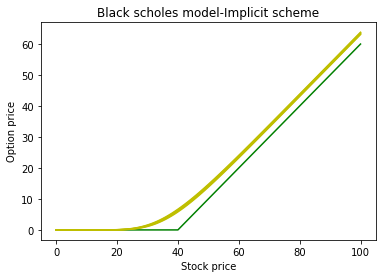

In [8]:
s = np.linspace(0, 100, 101)
plt.plot(s, grid[:,-1], 'g')

for i in range(0, 100, 20):
    plt.plot(s, grid[:, i], 'y')

plt.title('Black scholes model-Implicit scheme')
plt.xlabel('Stock price')
plt.ylabel('Option price')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

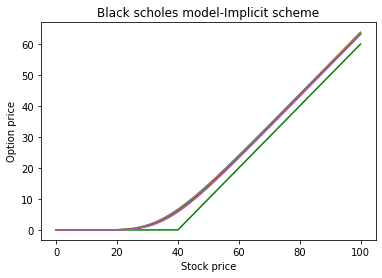

In [9]:
s = np.linspace(0, 100, 101)
plt.plot(s, grid[:,-1], 'g')

for i in range(0, 100, 20):
    plt.plot(s, grid[:, i])

plt.title('Black scholes model-Implicit scheme')
plt.xlabel('Stock price')
plt.ylabel('Option price')
plt.show


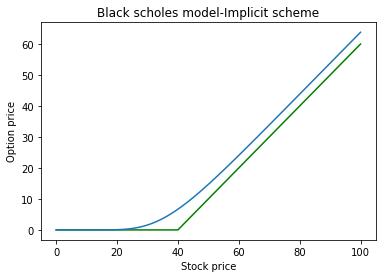

In [10]:
s = np.linspace(0, 100, 101)
plt.plot(s, grid[:,-1], 'g')
plt.plot(s, grid[:, 0])

plt.title('Black scholes model-Implicit scheme')
plt.xlabel('Stock price')
plt.ylabel('Option price')
plt.show()


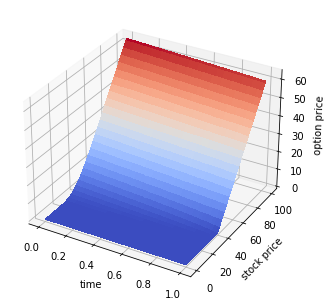

In [11]:
fig = plt.figure(figsize=(4,4))
ax = Axes3D(fig)

t, S = np.meshgrid(np.linspace(0, T, N+1), np.linspace(0, Smax, M+1))

ax.plot_surface(t, S, grid, cmap='coolwarm', linewidth=0, antialiased=False)
ax.set_xlabel('time')
ax.set_ylabel('stock price')
ax.set_zlabel('option price')
plt.show()